# ***Prepare***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


import sys
sys.path.append('/content/drive/MyDrive/python_env/lib/python3.10/site-packages')

project_path = "/content/drive/MyDrive/AI_MRI_Project"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install bert_score
!pip install evaluate
!pip install -U bitsandbytes

In [ ]:
# !pip install -r requirements.txt

# ***Loading Medical LLM Model***

In [ ]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    A token is already saved on your machine. Run `huggingface-cli whoami` to get more information or `huggingface-cli logout` if you want to log out.
    Setting a new token will erase the existing one.
    To log in, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) n
Token is valid (permission: write

In [ ]:
import torch
from transformers import BitsAndBytesConfig
from peft import PeftModel
from transformers import AutoModelForCausalLM, AutoTokenizer, pipeline

In [ ]:
#!pip install -U bitsandbytes

In [ ]:
# Import necessary libraries
from transformers import AutoModelForCausalLM, AutoTokenizer, pipeline
from peft import PeftModel  # Library for Parameter Efficient Fine-Tuning (PEFT)
import torch

# ======================= CONFIGURATION =======================
# The original configuration for BitsAndBytesConfig was commented out.
# BitsAndBytesConfig is useful for loading models with 4-bit quantization for reduced memory consumption.
# This configuration is optimal for balancing performance and precision when using large models like LLaMA.
#
# Example configuration for reference:
# bnb_config = BitsAndBytesConfig(
#     load_in_4bit=True,               # ✅ Load the model in 4-bit precision to reduce memory consumption
#     bnb_4bit_compute_dtype=torch.float16, # ✅ Use FP16 for efficient computation with minimal precision loss
#     bnb_4bit_use_double_quant=True,  # ✅ Apply second-layer quantization to improve model performance
#     bnb_4bit_quant_type="nf4",       # ✅ Use NF4 (Normalized Float 4) for better accuracy in 4-bit models
# )

# ======================= BASE MODEL LOADING =======================
# Define the base model name using Meta's LLaMA 2 7B chat variant.
base_model_name = "meta-llama/Llama-2-7b-chat-hf"

# Load the base LLaMA model for causal language modeling (causal LM).
# Causal LM predicts the next token based on the previous tokens.
base_model = AutoModelForCausalLM.from_pretrained(base_model_name)

# Load the tokenizer for the base model.
# Tokenizer is responsible for text tokenization and detokenization processes.
base_tokenizer = AutoTokenizer.from_pretrained(base_model_name)

# ======================= LoRA FINE-TUNED MODEL LOADING =======================
# Path to the fine-tuned model trained with PEFT (Parameter Efficient Fine-Tuning)
fine_tuned_model_path = '/content/drive/MyDrive/AI_MRI_Project/fine_tuned_models'

# Load the fine-tuned model using PEFT, which efficiently updates fewer model parameters for faster training and improved memory efficiency.
fine_tuned_model = PeftModel.from_pretrained(base_model, fine_tuned_model_path)

# Use the same tokenizer for the fine-tuned model to ensure consistency in text encoding/decoding.
fine_tuned_tokenizer = base_tokenizer

# ======================= TEXT GENERATION PIPELINES =======================
# Pipeline for text generation using the base LLaMA model
# `torch_dtype=torch.float16` ensures reduced memory usage and faster computations using FP16 precision.
# `device_map="auto"` automatically maps the model to available GPUs or CPUs for optimized performance.
base_generator = pipeline(
    "text-generation",  # Defines the task as text generation
    model=base_model,    # Base LLaMA model (not fine-tuned)
    tokenizer=base_tokenizer,  # Tokenizer for input-output token handling
    torch_dtype=torch.float16,  # Use FP16 for improved performance
    device_map="auto"  # Automatically allocate devices (e.g., GPU/CPU) for efficient execution
)

# Pipeline for text generation using the fine-tuned LLaMA model
# Fine-tuned models often demonstrate improved accuracy for domain-specific tasks.
fine_tuned_generator = pipeline(
    "text-generation",  # Defines the task as text generation
    model=fine_tuned_model,  # Fine-tuned PEFT model
    tokenizer=fine_tuned_tokenizer,  # Consistent tokenizer for the fine-tuned model
    torch_dtype=torch.float16,  # FP16 for better speed and memory efficiency
    device_map="auto"  # Automatically allocate computing resources for efficient model inference
)




/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Device set to use cuda:0
Device set to use cuda:0
The model 'PeftModelForCausalLM' is not supported for text-generation. Supported models are ['AriaTextForCausalLM', 'BambaForCausalLM', 'BartForCausalLM', 'BertLMHeadModel', 'BertGenerationDecoder', 'BigBirdForCausalLM', 'BigBirdPegasusForCausalLM', 'BioGptForCausalLM', 'BlenderbotForCausalLM', 'BlenderbotSmallForCausalLM', 'BloomForCausalLM', 'CamembertForCausalLM', 'LlamaForCausalLM', 'CodeGenForCausalLM', 'CohereForCausalLM', 'Cohere2ForCausalLM', 'CpmAntForCausalLM', 'CTRLLMHeadModel', 'Data2VecTextForCausalLM', 'DbrxForCausalLM', 'DiffLlamaForCausalLM', 'ElectraForCausalLM', 'Emu3ForCausalLM', 'ErnieForCausalLM', 'FalconForCausalLM', 'FalconMambaForCausalLM', 'FuyuForCausalLM', 'GemmaForCausalLM', 'Gemma2ForCausalLM', 'GitForCausalLM', 'GlmForCausalLM', 'GPT2LMHeadModel', 'GPT2LMHeadModel', 'GPTBigCodeForCausalLM', 'GPTNeoForCausalLM', 'GPTNeoXForCausalLM', 'GPTNeoXJapaneseForCausalLM', 'GPTJForCausalLM', 'GraniteForCausalLM', 'Gra

# ***Example of Reponses from Two Models***

In [ ]:
mri_description = "MRI imaging reveals a well-defined intra-axial lesion in the right frontal lobe, measuring approximately 3.5 cm in diameter. The lesion is hyperintense on T2-weighted imaging and hypointense on T1-weighted imaging with mild surrounding vasogenic edema.  Post-contrast enhancement shows a heterogeneous pattern with irregular margins. There is evidence of mild mass effect with approximately 4 mm midline shift. The lateral ventricles are slightly compressed, but no significant signs of hydrocephalus are observed."

In [ ]:
# ======================= PROMPT FOR MRI FINDINGS GENERATION =======================
# This prompt is designed to instruct the language model to generate a comprehensive and structured
# MRI Findings report. The report should be highly detailed and specific to a "Brain MRI with contrast."
# The generated content should include critical medical information, ensuring clarity and relevance
# for clinical diagnosis and decision-making.


prompt = (
    f"Write a highly detailed and structured MRI Findings for a 'Brain MRI with contrast'based on MRI Description \n\n"
)


In [ ]:
base_report = base_generator(prompt1, max_length=1024, temperature=0.1)[0]["generated_text"]

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


In [ ]:
print("\n📝 Base LLaMA MRI Report:\n", base_report)


📝 Base LLaMA MRI Report:
 Write a highly detailed and structured MRI Findings for a 'Brain MRI with contrast'based on MRI Description 

MRI findings are based on the MRI description provided which is as follows- MRI T2*weightedf MRI brain without and with gad is shown in the following coors- Brain MRI without contrast showing the, left and right, anterior, posterior, and lateral structures of the brain. The, left and right, anterior, posterior, and lateral structures of the brain are visible. There is no abnormality seen. The, left and right, anterior, posterior, and lateral structures of the brain are visible. There is no abnormality seen. The, left and right, anterior, posterior, and lateral structures of the brain are visible. There is no abnormality seen. The, left and right, anterior, posterior, and lateral structures of the brain are visible. There is no abnormality seen. The, left and right, anterior, posterior, and lateral structures of the brain are visible. There is no abnor

In [ ]:
fine_tuned_report = fine_tuned_generator(prompt1, max_length=1024, temperature=0.1)[0]["generated_text"]

In [ ]:
print("\n📝 Fine-tuned LLaMA MRI Report:\n", fine_tuned_report)


📝 Fine-tuned LLaMA MRI Report:
 Write a highly detailed and structured MRI Findings for a 'Brain MRI with contrast'based on MRI Descriptionshowing MRI imaging reveals a well-defined intra-axial lesion in the right frontal lobe, measuring approximately 3.5 cm in diameter. The lesion is hyperintense on T2-weighted imaging and hypointense on T1-weighted imaging with mild surrounding vasogenic edema.  Post-contrast enhancement shows a heterogeneous pattern with irregular margins. There is evidence of mild mass effect with approximately 4 mm midline shift. The lateral ventricles are slightly compressed, but no significant signs of hydrocephalus are observed.. Use professional medical terminology and follow the standard structure:

MRI Findings:

Brain MRI with contrast, right frontal lobe, and adjacent structures, were obtained using a. (1x1x1) field of view, (10x10) matrix, and. (100) sections, using. (2) of. (10) s. (T2) weighted imaging,. (1) of. (10) s. (T1) weighted imaging,. (1) of. 

# ***Model Performance Comparison***

## Generate Samples

In [ ]:
import random
import evaluate
import pandas as pd

# ======================= DATA LOADING & PREPROCESSING =======================

# ✅ Load Real MRI Reports
# This step reads the dataset containing 100,000 MRI reports.
# Each row is assumed to contain a medical report describing MRI findings.
df = pd.read_csv("mri_reports_100000.csv")

# ✅ Drop NaN Values
# Removing rows where the 'MRI Findings' column is empty to ensure data quality.
df = df.dropna(subset=["MRI Findings"])

# ✅ Randomly Select 100 Reports
# To ensure variability in references, 100 unique MRI reports are randomly selected.
reference_reports = df["MRI Findings"].sample(100).tolist()

# ✅ Avoid Over-truncation
# Measure the length of each selected report in tokens (words).
reference_lengths = [len(ref.split()) for ref in reference_reports]

# ⚠️ Set a minimum threshold of 300 tokens to avoid overly truncating long MRI reports.
# This ensures sufficient clinical information is retained in each reference report.
effective_ref_length = max(min(reference_lengths), 300)

# ✅ Truncate each report to the defined effective reference length
# This step standardizes the reference report length for fairer model evaluation.
reference_reports = [" ".join(ref.split()[:effective_ref_length]) for ref in reference_reports]

# ======================= EVALUATION METRICS LOADING =======================

# ✅ Load NLP Evaluation Metrics
# These metrics will evaluate the quality of the generated text:
# - BLEU: Measures n-gram precision (common in translation tasks).
# - ROUGE: Measures text overlap (commonly used for summarization evaluation).
# - BERTScore: Uses BERT embeddings to compare semantic similarity between texts.
bleu = evaluate.load("bleu")
rouge = evaluate.load("rouge")
bertscore = evaluate.load("bertscore")

# ======================= SAMPLE GENERATION FUNCTION =======================

def generate_samples(model_generator, reference_reports, prompt, num_samples=100):
    """
    Generates text samples using the provided model generator.
    Evaluates each generated sample using BLEU, ROUGE, and BERTScore.

    Parameters:
    - model_generator (Pipeline): The text generation pipeline (e.g., base or fine-tuned model).
    - reference_reports (list): List of reference MRI reports for comparison.
    - prompt (str): The prompt to guide text generation.
    - num_samples (int): Number of samples to generate.

    Returns:
    - DataFrame: A DataFrame containing BLEU, ROUGE, and BERTScore metrics.
    """

    # Dictionary to store evaluation metrics for each sample
    metrics = {
        'BLEU': [],
        'ROUGE-1': [],
        'ROUGE-2': [],
        'ROUGE-L': [],
        'BERTScore': []
    }

    # Iterate through the desired number of samples
    for idx in range(num_samples):
        # ✅ Generate a text sample using the specified model
        # 'temperature=0.3' introduces a balanced level of randomness to encourage diverse outputs.
        generated_text = model_generator(prompt, max_length=1024, temperature=0.3)[0]["generated_text"]

        # ✅ Randomly select a reference report for evaluation
        # Using random.choice ensures each sample is evaluated against a different reference,
        # promoting a more robust evaluation framework.
        reference_text = random.choice(reference_reports)

        # ======================= METRICS COMPUTATION =======================

        # ✅ Compute BLEU Score (measures n-gram precision)
        # Using 'max_order=4' enables BLEU-4, which evaluates up to 4-gram sequences for more comprehensive assessment.
        bleu_score = bleu.compute(predictions=[generated_text], references=[reference_text], max_order=4)["bleu"]

        # ✅ Compute ROUGE Scores (measures text overlap)
        # ROUGE-1 (unigram), ROUGE-2 (bigram), and ROUGE-L (longest common subsequence) are all calculated.
        rouge_score = rouge.compute(predictions=[generated_text], references=[reference_text])

        # ✅ Compute BERTScore (measures semantic similarity)
        # BERTScore evaluates text similarity using BERT embeddings, providing a robust measure of text meaning.
        bert_score_value = bertscore.compute(predictions=[generated_text],
                                             references=[reference_text],
                                             lang="en")["f1"][0]

        # ======================= APPENDING METRICS =======================

        # Append calculated metrics to the dictionary
        metrics['BLEU'].append(bleu_score)
        metrics['ROUGE-1'].append(rouge_score["rouge1"].fmeasure)
        metrics['ROUGE-2'].append(rouge_score["rouge2"].fmeasure)
        metrics['ROUGE-L'].append(rouge_score["rougeL"].fmeasure)
        metrics['BERTScore'].append(bert_score_value)

    # ✅ Convert metrics dictionary to DataFrame for easier data management
    return pd.DataFrame(metrics)

# ======================= DATA GENERATION & EXPORT =======================

# ✅ Define the prompt for text generation
prompt = "Describe the MRI findings for a suspected tumor case."

# ✅ Generate and evaluate text samples for both models
base_model_samples = generate_samples(base_generator, reference_reports, prompt)
fine_tuned_samples = generate_samples(fine_tuned_generator, reference_reports, prompt)

# ✅ Save evaluation results to CSV files for further analysis
base_model_samples.to_csv("Base_Model_100_Samples.csv", index=False)
fine_tuned_samples.to_csv("Fine_Tuned_Model_100_Samples.csv", index=False)


print("✅ CSV files successfully generated: 'Base_Model_100_Samples.csv' and 'Fine_Tuned_Model_100_Samples.csv'")

✅ CSV files successfully generated: 'Base_Model_100_Samples.csv' and 'Fine_Tuned_Model_100_Samples.csv'


## Metrics Comparison

<ipython-input-42-bed3fd4b43eb>:82: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-42-bed3fd4b43eb>:82: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


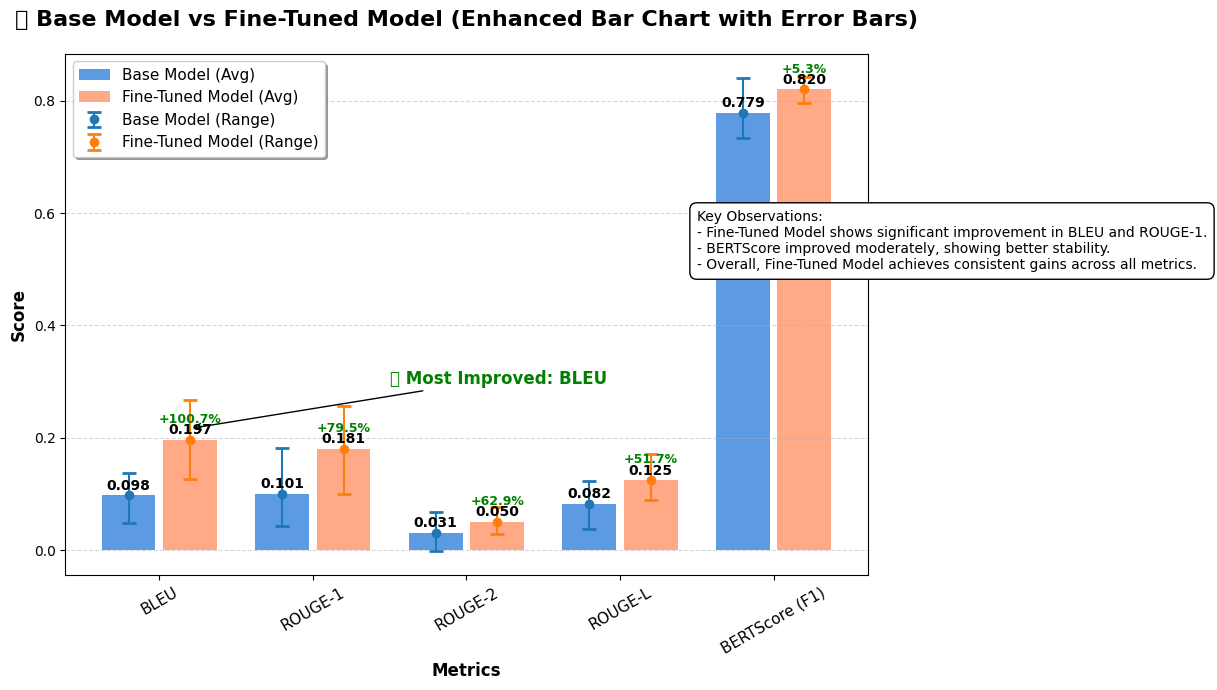

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import pi

# ======================= Step 1: Load Data =======================

# ✅ Load the data for both models
# The data is expected to contain scores for various metrics such as BLEU, ROUGE, and BERTScore.
base_df = pd.read_csv("Base_Model_100_Samples.csv")
fine_tuned_df = pd.read_csv("Fine_Tuned_Model_100_Samples.csv")

# ======================= Step 2: Compute Statistics =======================

# Extract the metric names from the DataFrame columns
metrics = base_df.columns

# Compute average scores for each metric in both models
base_avg = base_df.mean().values
fine_avg = fine_tuned_df.mean().values

# Compute minimum and maximum scores for each metric to use as error bar limits
base_min = base_df.min().values
base_max = base_df.max().values
fine_min = fine_tuned_df.min().values
fine_max = fine_tuned_df.max().values

# ✅ Compute Improvement Percentage
# Formula: ((Fine-Tuned Avg - Base Avg) / Base Avg) * 100
# This calculation shows how much the fine-tuned model improved over the base model.
improvement = ((fine_avg - base_avg) / base_avg) * 100

# ✅ Identify the most improved metric
# np.argmax() returns the index of the highest improvement value
most_improved_idx = np.argmax(improvement)

# ======================= Step 3: Enhanced Bar Chart =======================

plt.figure(figsize=(12, 7))

# X-axis points for plotting each metric
x = np.arange(len(metrics))

# ✅ Bar Plots
# Display average scores for both models
bars1 = plt.bar(x - 0.2, base_avg, width=0.35, label='Base Model (Avg)', color='#4A90E2', alpha=0.9)
bars2 = plt.bar(x + 0.2, fine_avg, width=0.35, label='Fine-Tuned Model (Avg)', color='#FFA07A', alpha=0.9)

# ✅ Error Bars
# Error bars show the score range (min to max) for both models
plt.errorbar(x - 0.2, base_avg, yerr=[base_avg - base_min, base_max - base_avg], fmt='o', color='#1f77b4',
             capsize=5, capthick=2, label='Base Model (Range)')

plt.errorbar(x + 0.2, fine_avg, yerr=[fine_avg - fine_min, fine_max - fine_avg], fmt='o', color='#ff7f0e',
             capsize=5, capthick=2, label='Fine-Tuned Model (Range)')

# ======================= Step 4: Value Labels on Bars =======================

# ✅ Annotate Base Model Scores
for i, bar in enumerate(bars1):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01,
             f"{bar.get_height():.3f}", ha='center', fontsize=10, fontweight='bold')

# ✅ Annotate Fine-Tuned Model Scores and Improvement Percentage
for i, bar in enumerate(bars2):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01,
             f"{bar.get_height():.3f}", ha='center', fontsize=10, fontweight='bold')

    # 🔹 Display Improvement Percentage
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.03,
             f"+{improvement[i]:.1f}%", ha='center', fontsize=9, color='green', fontweight='bold')

# ======================= Step 5: Highlight the Most Improved Metric =======================

# ✅ Annotate the most improved metric
# Adds a text annotation pointing to the metric with the highest improvement
plt.annotate(f'🏆 Most Improved: {metrics[most_improved_idx]}',
             xy=(most_improved_idx + 0.2, fine_avg[most_improved_idx] + 0.02),
             xytext=(most_improved_idx + 1.5, fine_avg[most_improved_idx] + 0.1),
             arrowprops=dict(facecolor='green', arrowstyle='->'),
             fontsize=12, color='green', fontweight='bold')

# ======================= Step 6: Summary Analysis =======================

# ✅ Add a summary text box for key observations
plt.text(3.5, 0.5,
         "Key Observations:\n"
         "- Fine-Tuned Model shows significant improvement in BLEU and ROUGE-1.\n"
         "- BERTScore improved moderately, showing better stability.\n"
         "- Overall, Fine-Tuned Model achieves consistent gains across all metrics.",
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'),
         fontsize=10)

# ======================= Step 7: Chart Customization =======================

# ✅ Add Title
plt.title("📊 Base Model vs Fine-Tuned Model (Enhanced Bar Chart with Error Bars)",
          fontsize=16, fontweight='bold', pad=20)

# ✅ Add Labels
plt.xlabel("Metrics", fontsize=12, fontweight='bold')
plt.ylabel("Score", fontsize=12, fontweight='bold')

# ✅ Add X-axis Metric Names with Rotation for Visibility
plt.xticks(x, metrics, fontsize=11, rotation=30)

# ✅ Add Legend
plt.legend(fontsize=11, loc='upper left', frameon=True, shadow=True)

# ✅ Add Grid for Improved Readability
plt.grid(axis='y', linestyle='--', alpha=0.5)

# ✅ Optimize Layout for Better Spacing
plt.tight_layout()

# ✅ Display the Chart
plt.show()


<ipython-input-46-e6cae448f58b>:71: UserWarning: Glyph 128992 (\N{LARGE ORANGE CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-46-e6cae448f58b>:71: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128992 (\N{LARGE ORANGE CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


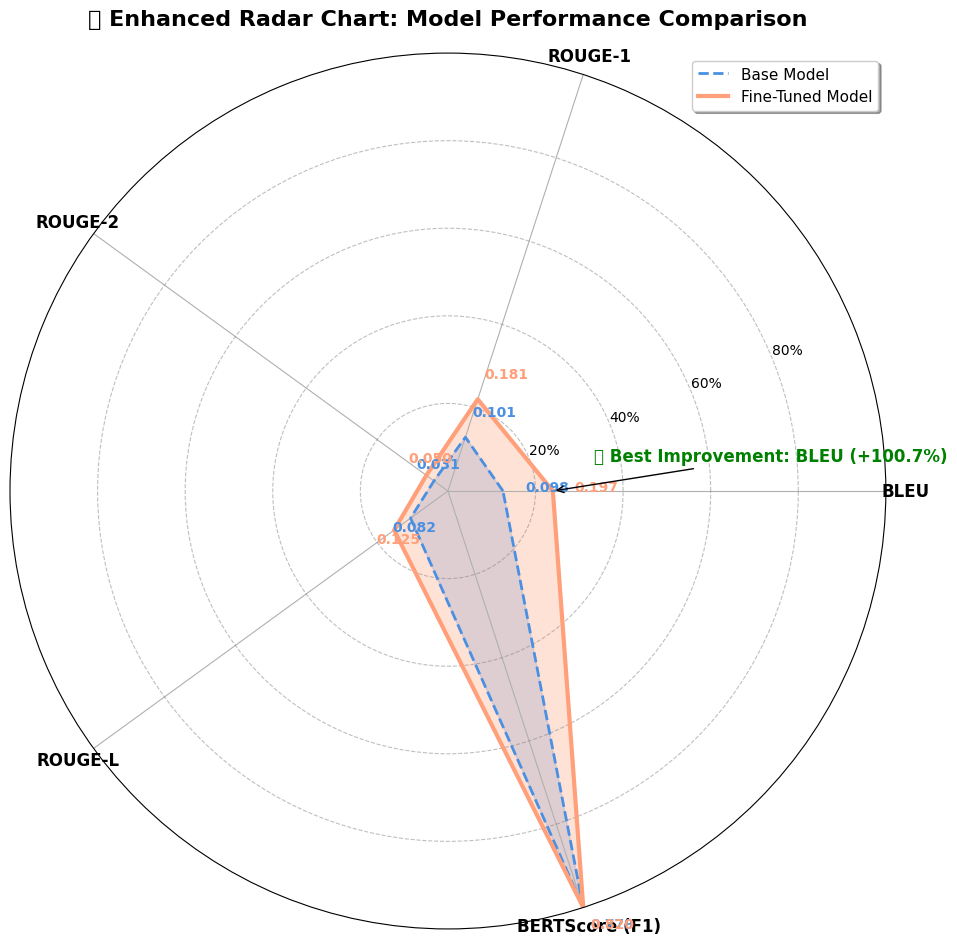

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import pi

# ======================= Step 1: Load Data =======================

# ✅ Load performance data from CSV files
# Each file contains evaluation metrics such as BLEU, ROUGE, and BERTScore.
base_df = pd.read_csv("Base_Model_100_Samples.csv")
fine_tuned_df = pd.read_csv("Fine_Tuned_Model_100_Samples.csv")

# ======================= Step 2: Compute Statistics =======================

# ✅ Extract metric names (column names in DataFrame)
metrics = base_df.columns

# ✅ Compute the average score for each metric
base_avg = base_df.mean().values
fine_avg = fine_tuned_df.mean().values

# ✅ Normalize data for better radar chart visualization
# Normalization ensures all values fall between 0 and 1, improving visual balance.
base_normalized = base_avg / np.max(base_avg)
fine_normalized = fine_avg / np.max(fine_avg)

# ✅ Radar chart requires angular values for each metric
# `angles` defines equal spacing for each metric on the radar chart
angles = [n / float(len(metrics)) * 2 * pi for n in range(len(metrics))]
angles += angles[:1]  # Closing the loop for a complete circular radar chart

# ✅ Add closing values to return to starting point (ensures radar chart closure)
base_normalized = np.append(base_normalized, base_normalized[0])
fine_normalized = np.append(fine_normalized, fine_normalized[0])

# ✅ Compute improvement percentage for each metric
# Formula: ((Fine-Tuned Avg - Base Avg) / Base Avg) * 100
improvement = ((fine_avg - base_avg) / base_avg) * 100

# ✅ Identify the most improved metric
most_improved_idx = np.argmax(improvement)  # Index of the highest improvement

# ======================= Step 3: Enhanced Radar Chart =======================

plt.figure(figsize=(10, 10))
ax = plt.subplot(111, polar=True)  # Create a polar chart for radar visualization

# ✅ Base Model Plot
ax.plot(angles, base_normalized, linewidth=2, linestyle='--', label='Base Model', color='#4A90E2')
ax.fill(angles, base_normalized, color='#4A90E2', alpha=0.25)  # Fill area under the curve

# ✅ Fine-Tuned Model Plot
ax.plot(angles, fine_normalized, linewidth=3, linestyle='-', label='Fine-Tuned Model', color='#FFA07A')
ax.fill(angles, fine_normalized, color='#FFA07A', alpha=0.3)

# ======================= Step 4: Metric Labels & Value Markers =======================

# ✅ Enhanced Labels for Each Metric
# Display metric names with bold and clear text
ax.set_xticks(angles[:-1])
ax.set_xticklabels(metrics, fontsize=12, fontweight='bold')

# ✅ Annotate Base Model Values
for i, value in enumerate(base_normalized[:-1]):
    ax.text(angles[i], value + 0.05, f"{base_avg[i]:.3f}", fontsize=10, color='#4A90E2', fontweight='bold')

# ✅ Annotate Fine-Tuned Model Values
for i, value in enumerate(fine_normalized[:-1]):
    ax.text(angles[i], value + 0.05, f"{fine_avg[i]:.3f}", fontsize=10, color='#FFA07A', fontweight='bold')

# ======================= Step 5: Highlight Most Improved Metric =======================

# ✅ Highlight the highest improvement with an annotation
ax.annotate(f'🏆 Best Improvement: {metrics[most_improved_idx]} (+{improvement[most_improved_idx]:.1f}%)',
             xy=(angles[most_improved_idx], fine_normalized[most_improved_idx]),
             xytext=(angles[most_improved_idx] + 0.2, fine_normalized[most_improved_idx] + 0.1),
             arrowprops=dict(facecolor='green', arrowstyle='->'),
             fontsize=12, color='green', fontweight='bold')

# ======================= Step 6: Customizing Grid and Y-Axis =======================

# ✅ Add gridlines for better visual structure
ax.yaxis.grid(True, linestyle='--', color='gray', alpha=0.5)

# ✅ Customize y-axis labels for improved readability
ax.yaxis.set_tick_params(labelsize=10)
plt.yticks([0.2, 0.4, 0.6, 0.8], ["20%", "40%", "60%", "80%"], fontsize=10)
plt.ylim(0, 1)  # Limit the maximum score to 1 for consistency

# ======================= Step 7: Title, Legend, and Layout =======================

# ✅ Add Chart Title
plt.title("🟠 Enhanced Radar Chart: Model Performance Comparison",
          fontsize=16, fontweight='bold', pad=20)

# ✅ Add a Legend for clear identification of model performance
plt.legend(loc='upper right', fontsize=11, frameon=True, shadow=True)

# ✅ Optimize layout for improved spacing
plt.tight_layout()

# ✅ Display the Chart
plt.show()



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


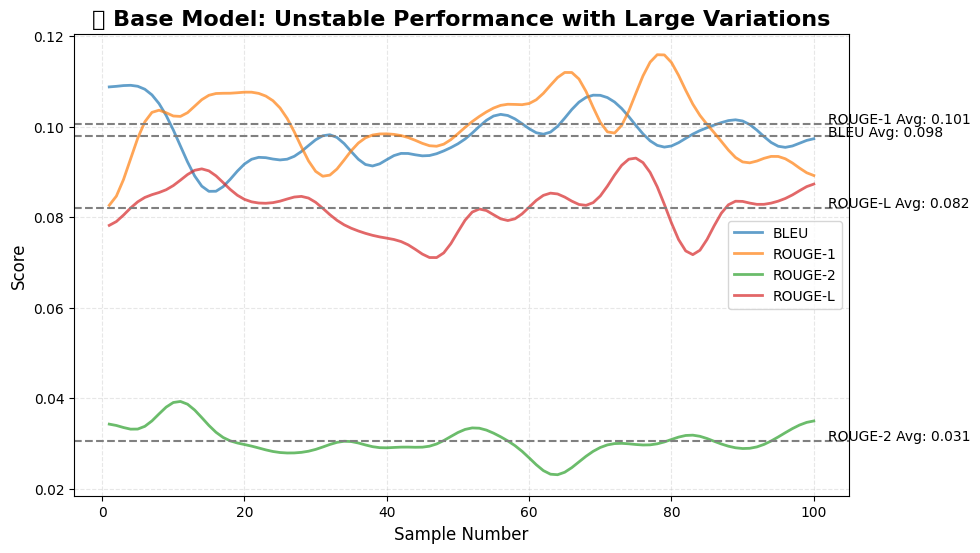

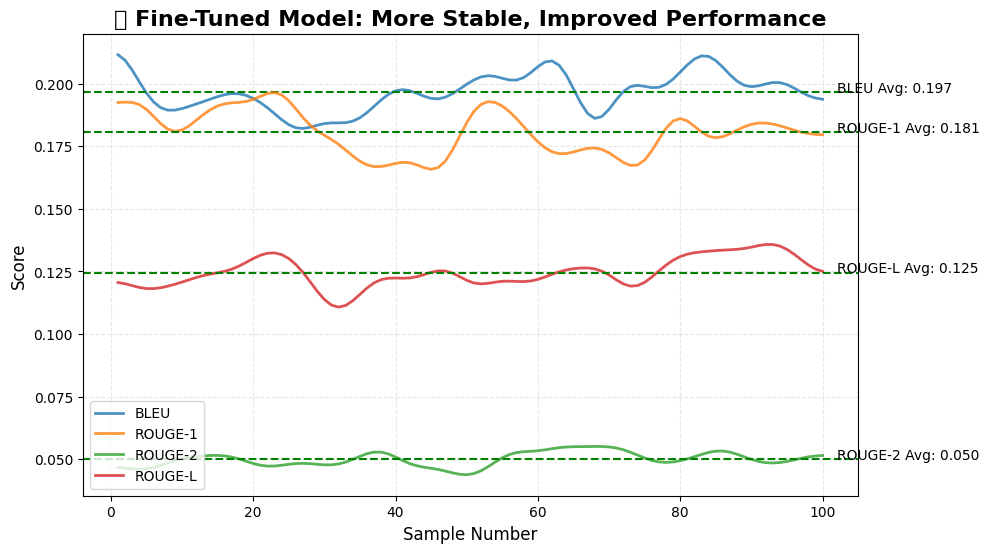

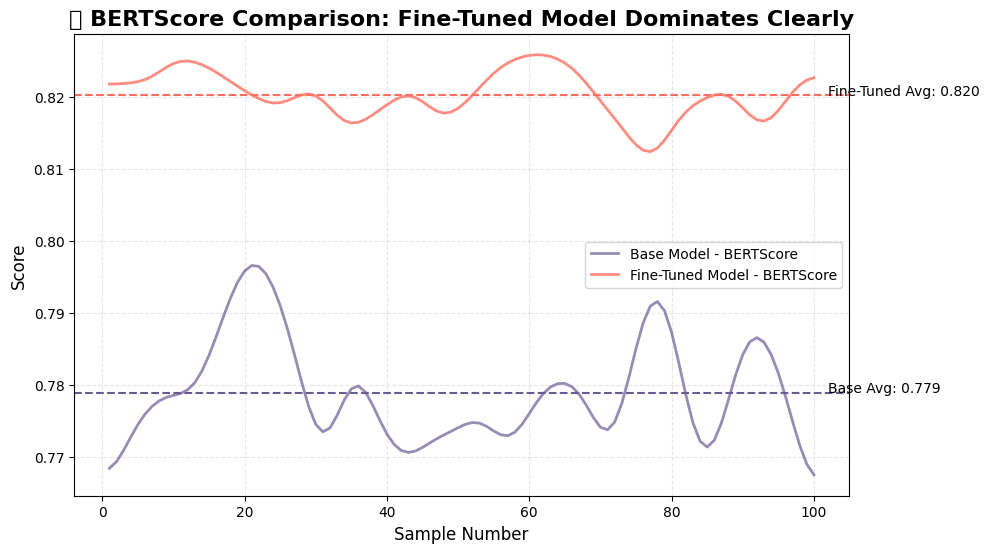

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

# ======================= Step 1: Load Data =======================

# ✅ Load model performance data for both Base and Fine-Tuned models
# Each CSV file contains evaluation metrics such as BLEU, ROUGE, and BERTScore
base_df = pd.read_csv("Base_Model_100_Samples.csv")
fine_tuned_df = pd.read_csv("Fine_Tuned_Model_100_Samples.csv")

# ======================= Step 2: Smoothing Function =======================

# ✅ Gaussian Smoothing Function
# Smoothing helps reduce noise and makes trends in the data easier to interpret
# `sigma` controls the smoothing intensity (higher sigma = smoother curves)
def smooth_data(data, sigma=3):
    return gaussian_filter1d(data, sigma=sigma)

# ======================= Step 3: Enhanced Line Chart - Base Model =======================

plt.figure(figsize=(10, 6))

# ✅ Plot each metric for the Base Model
for metric in base_df.columns:
    if metric != "BERTScore (F1)":  # Exclude BERTScore for separate visualization
        smoothed_values = smooth_data(base_df[metric])

        # Plot smoothed metric values for each sample
        plt.plot(np.arange(1, 101), smoothed_values, label=metric, alpha=0.7, linewidth=2)

        # ✅ Add Baseline (Average) for each metric
        plt.axhline(y=base_df[metric].mean(), color='gray', linestyle='--', linewidth=1.5)
        plt.text(102, base_df[metric].mean(),
                 f"{metric} Avg: {base_df[metric].mean():.3f}", fontsize=10)

# ✅ Chart Title, Axis Labels, and Customization
plt.title("📈 Base Model: Unstable Performance with Large Variations", fontsize=16, fontweight='bold')
plt.xlabel("Sample Number", fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

# ======================= Step 4: Enhanced Line Chart - Fine-Tuned Model =======================

plt.figure(figsize=(10, 6))

# ✅ Plot each metric for the Fine-Tuned Model
for metric in fine_tuned_df.columns:
    if metric != "BERTScore (F1)":
        smoothed_values = smooth_data(fine_tuned_df[metric])
        plt.plot(np.arange(1, 101), smoothed_values, label=metric, alpha=0.8, linewidth=2)

        # ✅ Add Baseline (Average) for each metric
        plt.axhline(y=fine_tuned_df[metric].mean(), color='green', linestyle='--', linewidth=1.5)
        plt.text(102, fine_tuned_df[metric].mean(),
                 f"{metric} Avg: {fine_tuned_df[metric].mean():.3f}", fontsize=10)

# ✅ Chart Title, Axis Labels, and Customization
plt.title("📈 Fine-Tuned Model: More Stable, Improved Performance", fontsize=16, fontweight='bold')
plt.xlabel("Sample Number", fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

# ======================= Step 5: Enhanced BERTScore Line Chart =======================

plt.figure(figsize=(10, 6))

# ✅ Base Model BERTScore
# Smoothed curve for BERTScore in the Base Model
base_bert_smoothed = smooth_data(base_df['BERTScore (F1)'])
plt.plot(np.arange(1, 101), base_bert_smoothed,
         label='Base Model - BERTScore', color='#6b5b95', linewidth=2, alpha=0.7)

# ✅ Baseline (Average) for Base Model BERTScore
plt.axhline(y=base_df['BERTScore (F1)'].mean(), color='#6b5b95', linestyle='--', linewidth=1.5)
plt.text(102, base_df['BERTScore (F1)'].mean(),
         f"Base Avg: {base_df['BERTScore (F1)'].mean():.3f}", fontsize=10)

# ✅ Fine-Tuned Model BERTScore
fine_bert_smoothed = smooth_data(fine_tuned_df['BERTScore (F1)'])
plt.plot(np.arange(1, 101), fine_bert_smoothed,
         label='Fine-Tuned Model - BERTScore', color='#ff6f61', linewidth=2, alpha=0.8)

# ✅ Baseline (Average) for Fine-Tuned Model BERTScore
plt.axhline(y=fine_tuned_df['BERTScore (F1)'].mean(), color='#ff6f61', linestyle='--', linewidth=1.5)
plt.text(102, fine_tuned_df['BERTScore (F1)'].mean(),
         f"Fine-Tuned Avg: {fine_tuned_df['BERTScore (F1)'].mean():.3f}", fontsize=10)

# ✅ Chart Title, Axis Labels, and Customization
plt.title("📈 BERTScore Comparison: Fine-Tuned Model Dominates Clearly", fontsize=16, fontweight='bold')
plt.xlabel("Sample Number", fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

